In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import plotly.graph_objects as go
plt.rcParams["figure.figsize"] = (16, 10)

# Dataset: 120 years of Olympic history: athletes and results

Basic bio data on athletes and medal results from Athens 1896 to Rio 2016.

**\*Obs:** Dataset obtido pelo [Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/data?select=athlete_events.csv).

# Obtendo os datasets

In [2]:
df = pd.read_csv('datasets/athlete_events.csv')
df_noc = pd.read_csv('datasets/noc_regions.csv')
df_merged = pd.merge(df, df_noc, on='NOC', how='left')

df_w = df.loc[df['Sex'] == 'F']
df_m = df.loc[df['Sex'] == 'M']

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Informações gerais do dataset

Este dataset possui 271116 linhas e 15 colunas. Cada linha representa as informação de um evento de um atleta. O ID é usado como identificador porque podem existir nomes repetidos no dataset. NaN na coluna 'Medal' significa que o atleta não ganhou nenhuma medalha naquele evento. As informações são desde 1896 em Atenas até 2016 no Rio de Janeiro. O dataset df_noc é um dataset que possui o NOC (National Olympic Committee 3 letter code), a região da olímpiada e algumas notas.

Atributos:
* **ID** - identificador único do atleta
* **Name** - nome do atleta
* **Sex** - sexo do atleta (M e F)
* **Age** - idade do atleta
* **Height** - altura do atleta em cm
* **Weight** - peso do atleta em kg
* **Team** - país que o atleta representa
* **NOC** - National Olympic Committee
* **Games** - ano e temporada do evento
* **Year** - ano do evento
* **Season** - temporada do evento
* **City** - cidade em que aconteceu o evento
* **Sport** - esporte que o atleta participou
* **Event** - nome do evento
* **Medal** - medalha que o atleta ganhou (NaN, Gold, Bronze e Silver)

**Obs**: Datases que iniciam com _ são dataset com com remoção de linhas repetidas pelo nome, ignorando o número de vezes que o atleta participou.

# Análise

## Matriz de correlação

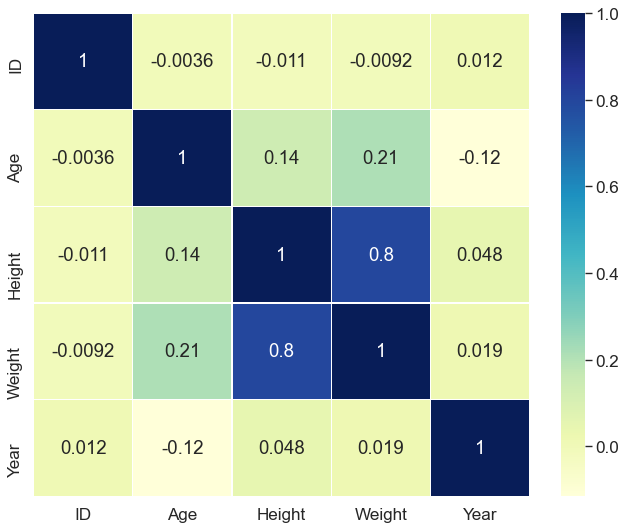

In [3]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(df.corr(), annot=True, linewidth=0.2, cmap='YlGnBu')
plt.show()

Com a matriz de correlação é possível extrair quais atributos possuem mais correlação. Na tabela acima, Peso e Altura possuem uma grande correlação.

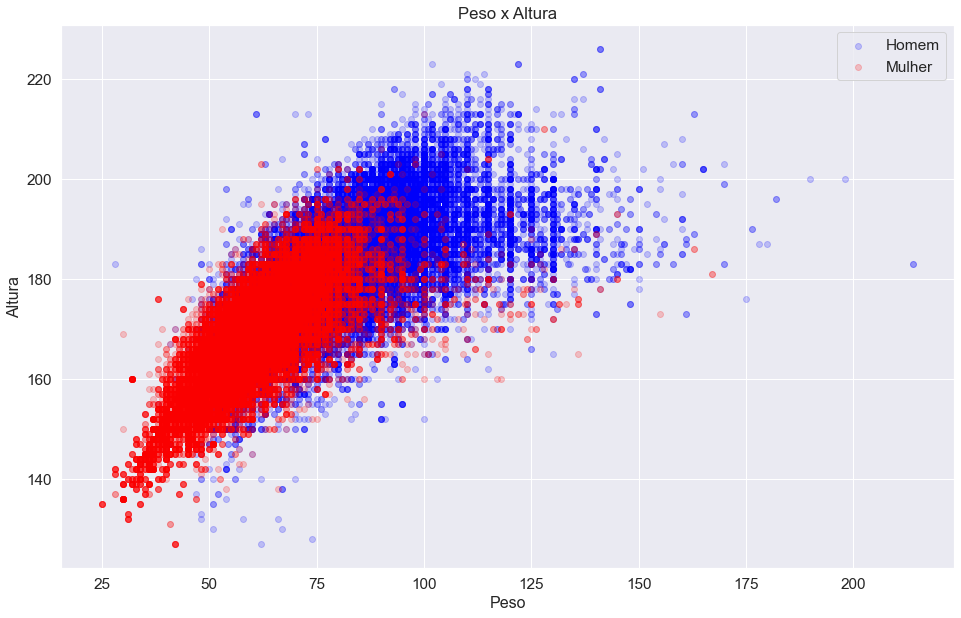

In [4]:
fig, axes = plt.subplots(figsize=(16, 10))
plt.scatter(df_m['Weight'], df_m['Height'], c='blue', alpha=0.2)
plt.scatter(df_w['Weight'], df_w['Height'], c='red', alpha=0.2)
plt.legend(['Homem','Mulher'])
plt.xlabel('Peso', fontsize=16)
plt.ylabel('Altura', fontsize=16)
plt.title('Peso x Altura')
plt.show()

Obersando o scatter plot, é possível observar alguns outliers de alguns atletas. O ponto mais a esquerda e menor pertence a atleta Choi Myong-Hui, ginasta de 14 anos com altura de 1,35m e 25kg. Ela participou de seis jogos em 1980, mas não ganhou nenhuma medalha.

In [5]:
df.loc[(df['Name'] == 'Choi Myong-Hui')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40849,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN
40850,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,NaN
40851,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,NaN
40852,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN
40853,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,NaN
40854,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Balance Beam,NaN


## Contagem do número de atletas por sexo

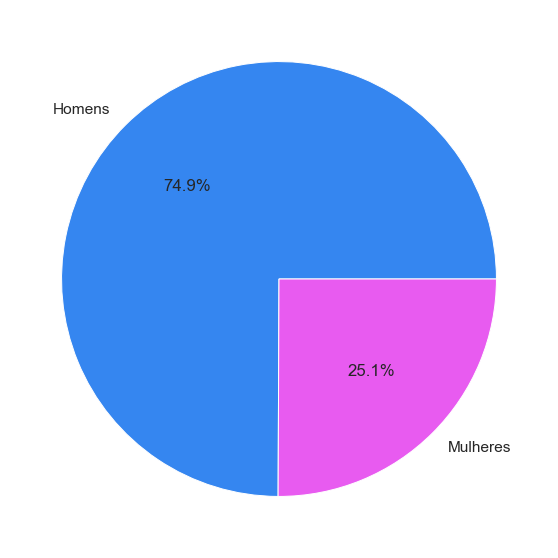

In [6]:
fig, axes = plt.subplots()
_df = df.drop_duplicates(subset='ID', keep="first")
_df.Sex.value_counts(normalize=True).plot(kind='pie', colors=['#3586F0','#E85BF0'], labels=['Homens', 'Mulheres'], ax=axes, autopct='%1.1f%%')
axes.set_ylabel('')
plt.show()

## Modalidades com mais medalhas de ouro

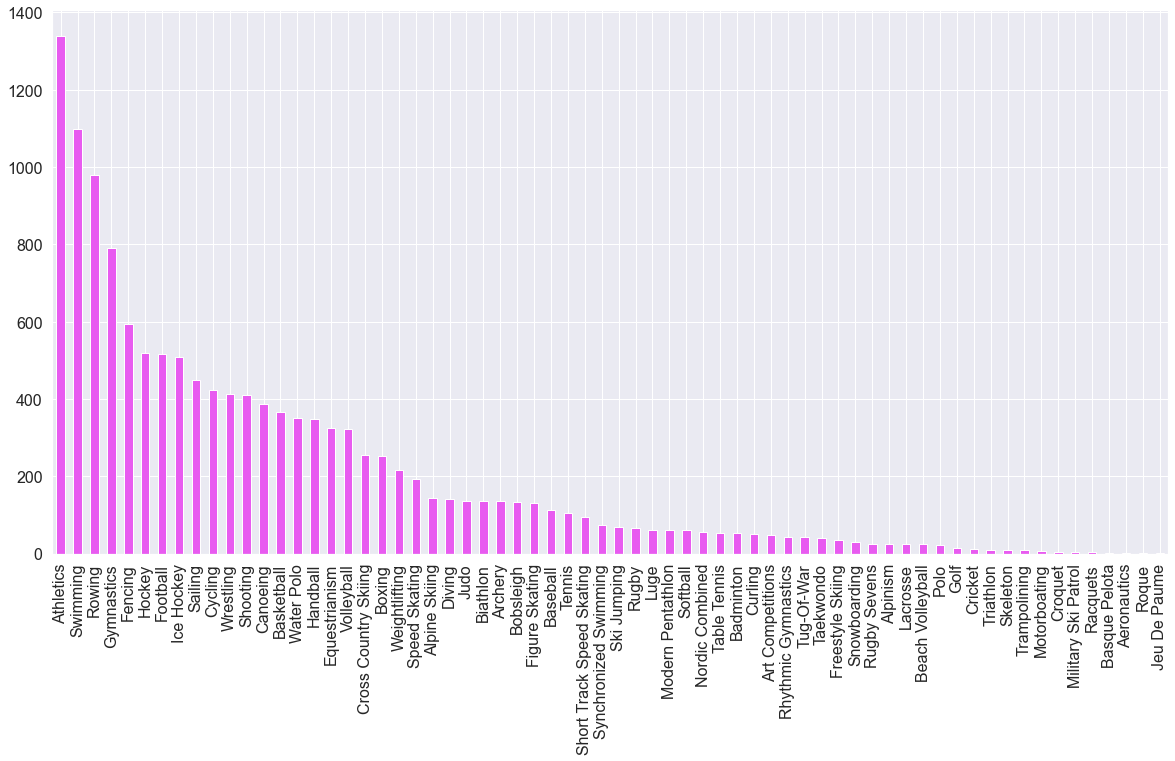

In [7]:
df_gold = df.loc[df['Medal'] == 'Gold']
fig, axes = plt.subplots(figsize=(20, 10))
df_gold.Sport.value_counts().plot(kind='bar', color='#E85BF0', ax=axes, fontsize=16)
plt.show()

Podemos ver que a modalidade Atletismo é a que possui o maior número de medalhas de ouro. Esse resultado pode ser esperado porque Atletismo é um conjunto de esportes formado por várias modalidades: corrida, salto, marcha e lançamentos, portanto o número de medalhas de ouro é superior as demais.

## Cidades com mais medalhas de ouro

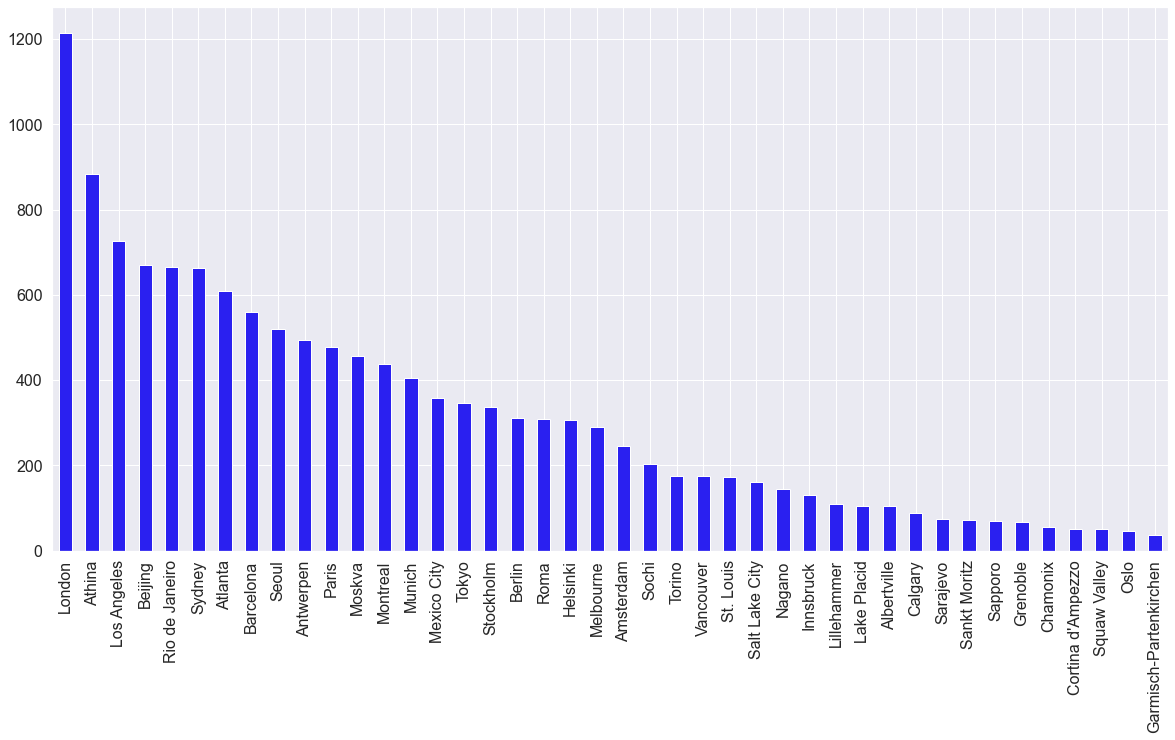

In [8]:
fig, axes = plt.subplots(figsize=(20, 10))
df_gold.City.value_counts().plot(kind='bar', color='#2A20F0', ax=axes, fontsize=16)
plt.show()

A gráfico acima mostra o número de medalhistas de ouro por cidade. Em primeiro lugar temos a cidade de Londres e, como podemos ver, Rio de Janeiro ocupa a 5º posição nesse ranking. Vamos buscar mais informações a respeito do Rio de Janeiro.

### Rio de Janeiro

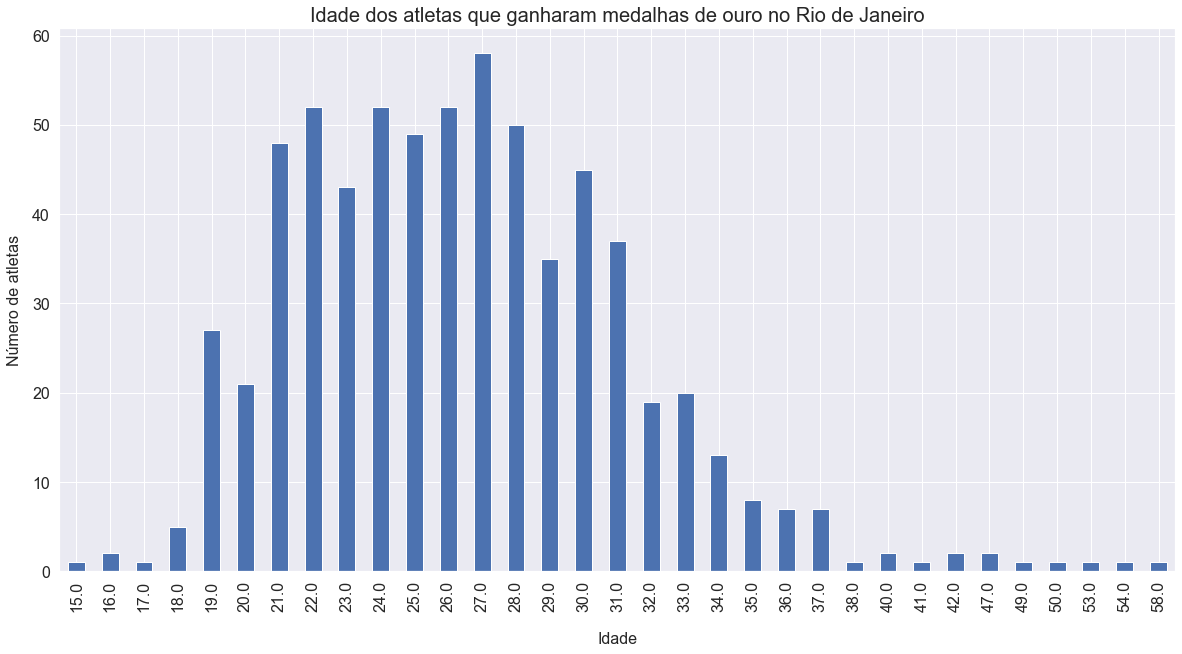

In [9]:
df_gold_rj = df_gold.loc[df_gold['City'] == 'Rio de Janeiro']
fig, axes = plt.subplots(figsize=(20, 10))
df_gold_rj.Age.sort_values().value_counts(sort=False).plot(kind='bar', ax=axes, fontsize=16)
plt.title('Idade dos atletas que ganharam medalhas de ouro no Rio de Janeiro', fontsize=20)
axes.set_xlabel('Idade', fontsize=16, labelpad=20)
axes.set_ylabel('Número de atletas', fontsize=16, labelpad=10)
plt.show()

A maioria dos medalhistas de ouro do Rio de Janeiro são jovens entre 21 e 30 anos.

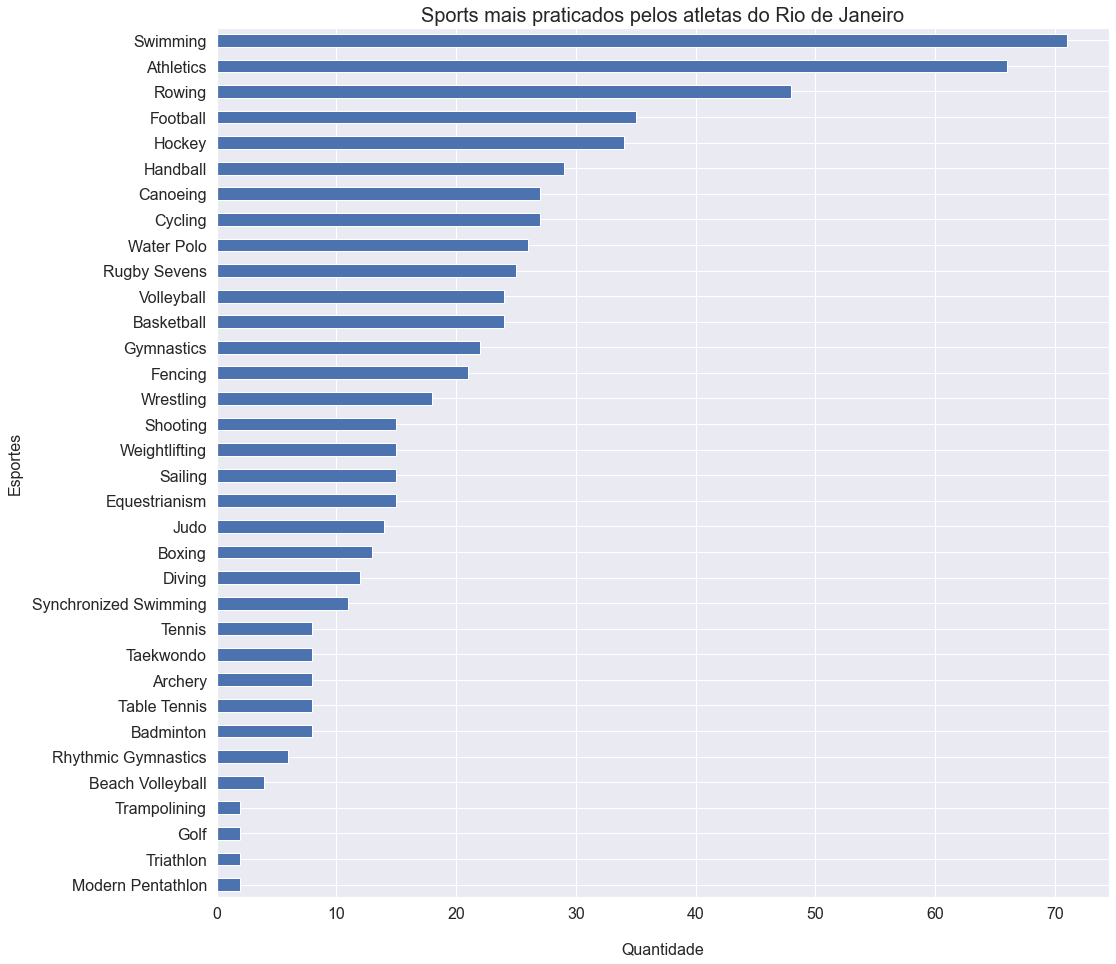

In [10]:
fig, axes = plt.subplots(figsize=(16, 16))
df_gold_rj.Sport.value_counts().sort_values().plot(kind='barh', ax=axes, fontsize=16)
plt.title('Sports mais praticados pelos atletas do Rio de Janeiro', fontsize=20)
axes.set_xlabel('Quantidade', fontsize=16, labelpad=20)
axes.set_ylabel('Esportes', fontsize=16, labelpad=10)
plt.show()

### TODO

* Plot entre Team com duplas nacionalidades e o NOC - lixo
* **Aumento do número de atletas mulheres ao longo dos anos** ok
* Comparativo geral entre temporadas: Summer e Winter - se der tempo
* **Cálculo do IMC e análises** ok 
* **Competidor que mais participou/mais ganhou** ok
* Sumário por olimpíada ok
* Cidade que já sediaram olimpíadas de Inverno e de Verão - vou fazer
* **Esportes que foram adicionados ao longo dos anos** semi ok
 - Barplot ao longo dos anos mostrando novas modalidades - n vai da
* **Rio de Janeiro vs Atenas: fazer uma análise geral** ok

## Aumento do número de mulheres ao longo dos anos

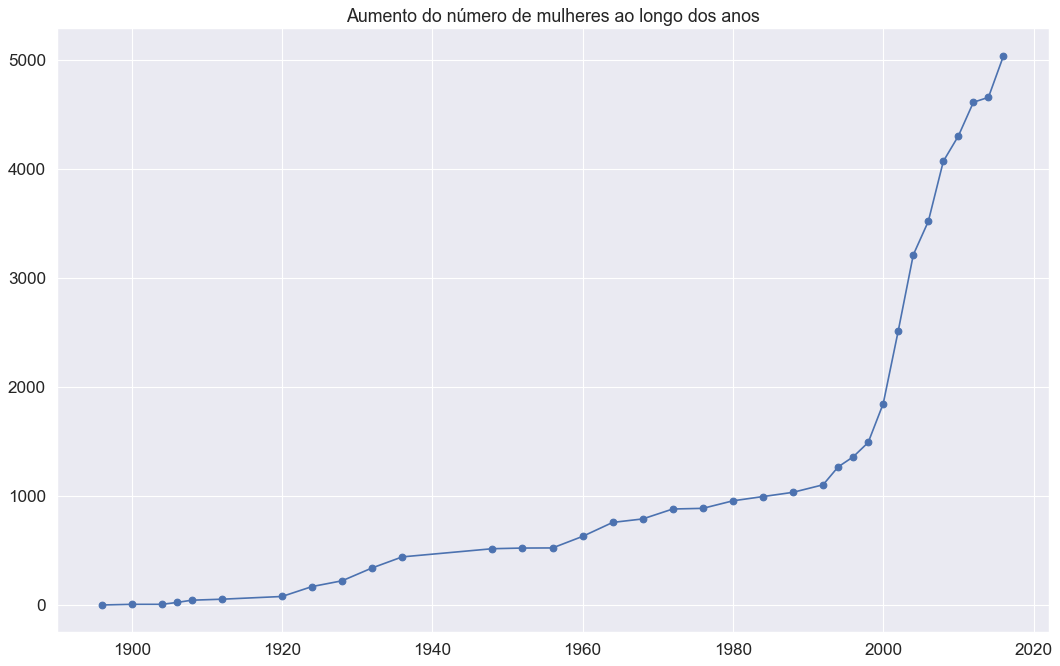

In [11]:
women = {k: np.unique(list(v)).size for k, v in df_w.groupby('Year')['ID']}
women[1896] = 0

xw = sorted(women.keys())
yw = sorted(women.values())

plt.figure(figsize=(16, 10), dpi=80)
plt.plot(xw, yw, '-o')
plt.title('Aumento do número de mulheres ao longo dos anos', fontsize=16)
plt.show()

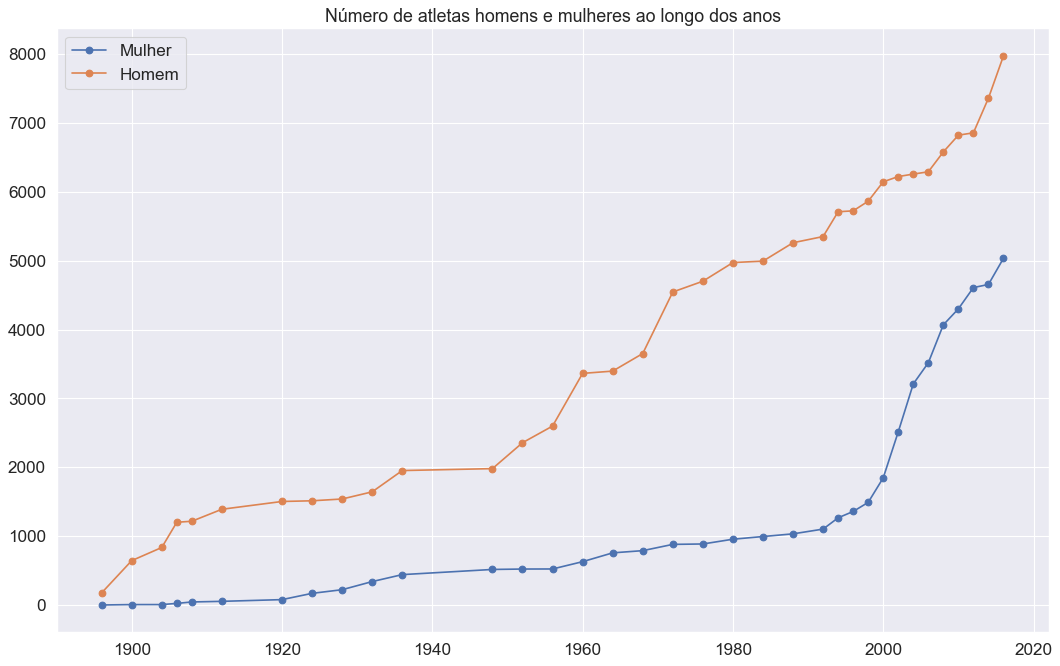

In [12]:
men = {k: np.unique(list(v)).size for k, v in df_m.groupby('Year')['ID']}
xm = sorted(men.keys())
ym = sorted(men.values())

plt.figure(figsize=(16, 10), dpi=80)
plt.plot(xw, yw, '-o')
plt.plot(xm, ym, '-o')
plt.legend(['Mulher', 'Homem'])
plt.title('Número de atletas homens e mulheres ao longo dos anos', fontsize=16)
plt.show()

### Número de mulheres por temporada

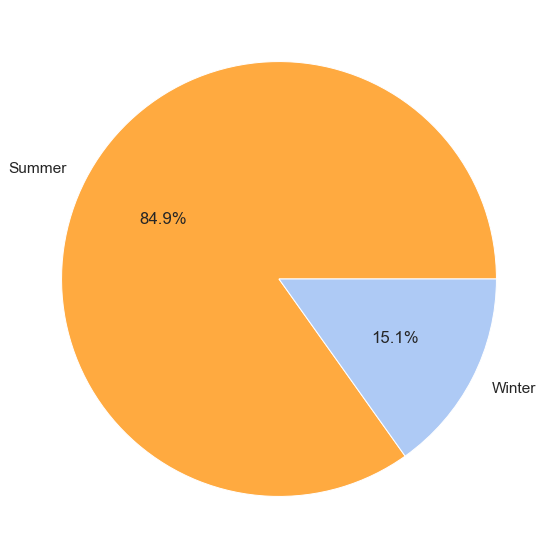

In [13]:
_df_women = df_w.drop_duplicates(subset='ID', keep="first")
_df_men = df_m.drop_duplicates(subset='ID', keep="first")

fig, axes = plt.subplots()
_df_women.Season.value_counts(normalize=True).plot(kind='pie', ax=axes, colors=['#FFAA40','#AECAF5'], autopct='%1.1f%%')
axes.set_ylabel('')
plt.show()

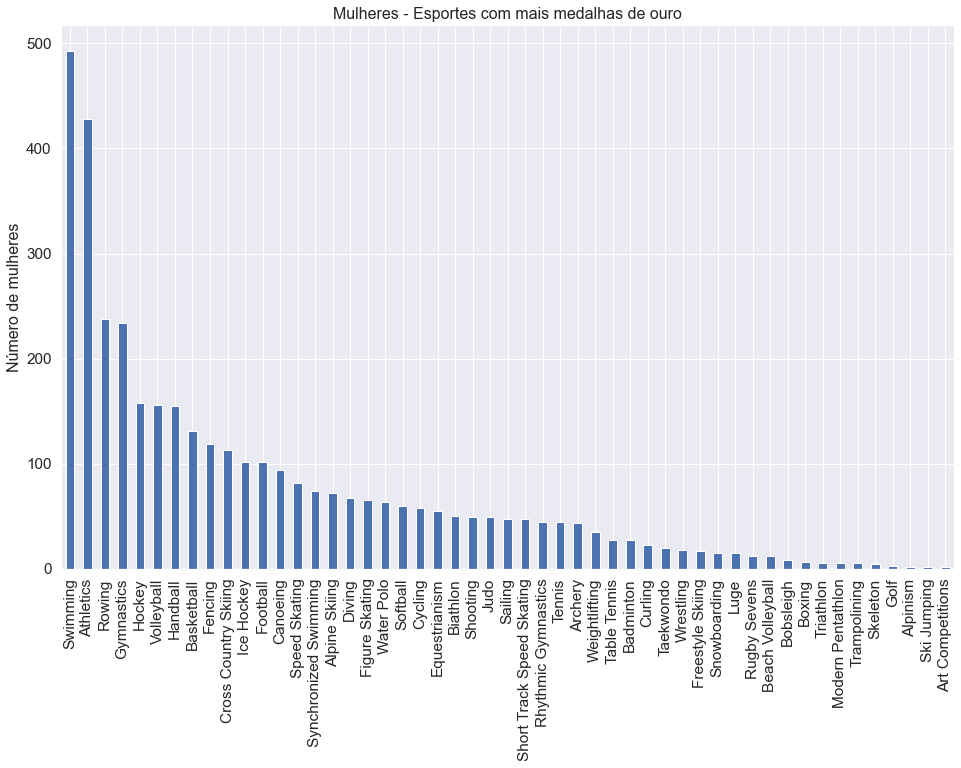

In [14]:
df_women_gold = df_w.loc[df['Medal'] == 'Gold']
df_women_gold.Sport.value_counts().plot(kind='bar')
plt.title('Mulheres - Esportes com mais medalhas de ouro', fontsize=16)
plt.ylabel('Número de mulheres', fontsize=16)
plt.show()

O número de mulheres nas modalidades Atléticas é maior que na modalide Natação, mas o númer de medalhes de ouro é maior na modalidade Natação.

## Análise do IMC (Índice de massa corporal)

\begin{equation*}
\text{IMC = } \frac{Weight}{(Height)^2}.
\end{equation*}

In [15]:
imc_df = df.copy()
imc_df = imc_df.dropna(axis=0, subset=['Height', 'Weight'])
imc_df['IMC'] = imc_df['Weight'] / ((imc_df['Height']/100) ** 2)

# procurar imc ideala
df_atletas = imc_df.drop_duplicates(subset='ID', keep="first") # precisa disso?
df_atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,IMC
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20.761246
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,23.959094
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,21.220009
18,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,21.499597


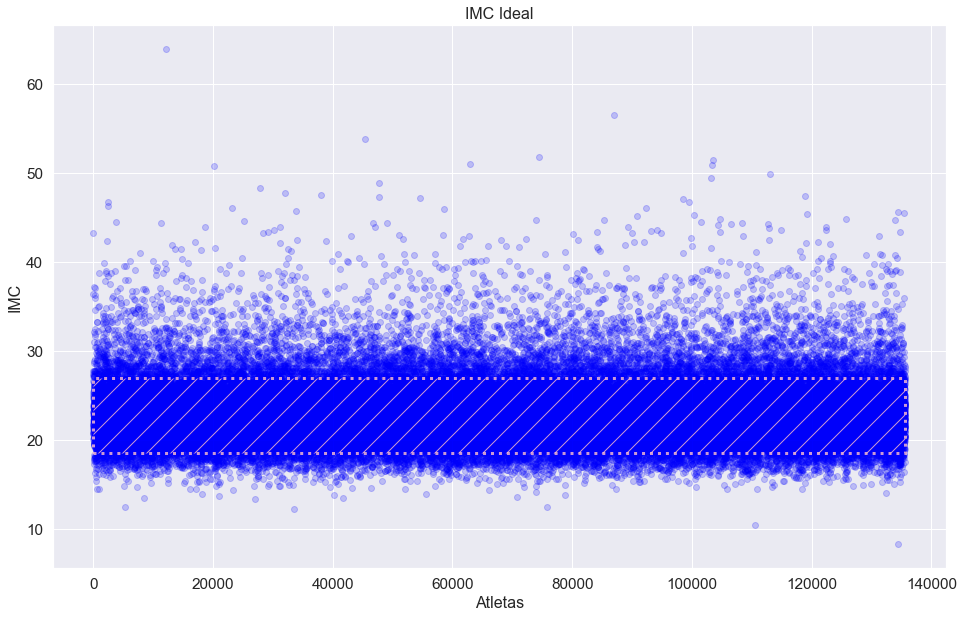

In [16]:
fig, axes = plt.subplots(figsize=(16, 10))
axes.add_patch(Rectangle((0, 18.5), 
                        max(df_atletas['ID']), 8.5, 
                        fc ='None',
                        alpha = 0.8,
                        ec ='pink',
                        hatch = '/',
                        ls = ':',
                        lw = 3)) 
plt.scatter(df_atletas['ID'], df_atletas['IMC'], c='blue', alpha=0.2)
plt.title('IMC Ideal', fontsize=16)
plt.xlabel('Atletas', fontsize=16)
plt.ylabel('IMC', fontsize=16)
plt.show()

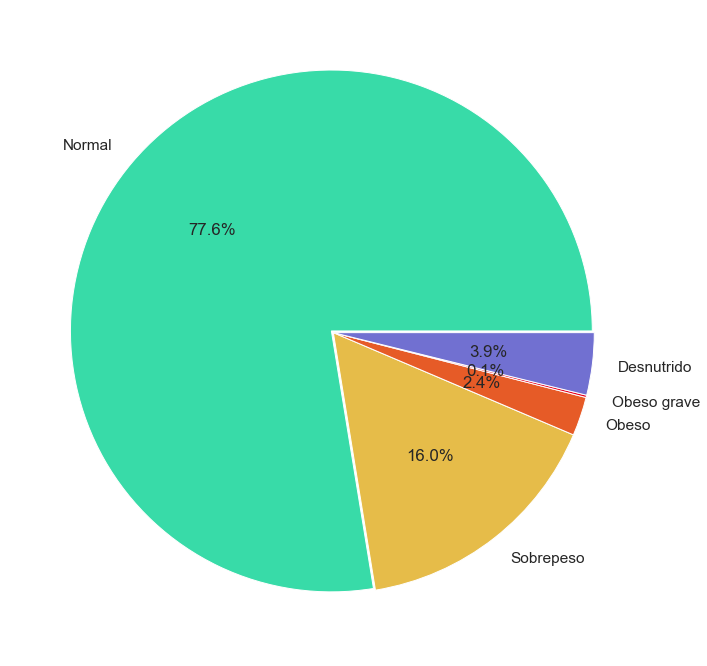

In [17]:
df_imclassified = {'Normal': 0, 'Sobrepeso': 0, 'Obeso': 0, 'Obeso grave': 0, 'Desnutrido': 0}

for atl in df_atletas['IMC']:
    if 18.5 <= atl < 25:
        df_imclassified['Normal'] += 1
    elif 25 <= atl < 30:
        df_imclassified['Sobrepeso'] += 1
    elif 30 <= atl < 40:
        df_imclassified['Obeso'] += 1
    elif atl >= 40:
        df_imclassified['Obeso grave'] += 1
    else:
        df_imclassified['Desnutrido'] += 1

labels = list(df_imclassified.keys())
sizes = list(df_imclassified.values())
explode = (0.01, 0, 0, 0.0, 0)

fig1, ax1 = plt.subplots(figsize=(14, 12))
ax1.pie(sizes, explode=explode, labels=labels, colors = ['#38DBA8', '#E6BC49', '#E65B27', '#E60020', '#7170D1'], autopct='%1.1f%%')


plt.show()

## Novos esportes ao longo dos anos

In [140]:
hist_aux = []
df_sports = df.copy()
sports = {k: list(set(v)) for k, v in df_sports.groupby('Year')['Sport']}
new_sports = {1896: sports.pop(1896)}

for item in new_sports[1896]:
    hist_aux.append(item)

for k, v in sports.items():
    new_sports[k] = []
    for item in v:
        if item not in hist_aux:
            hist_aux.append(item)
            new_sports[k].append(item)

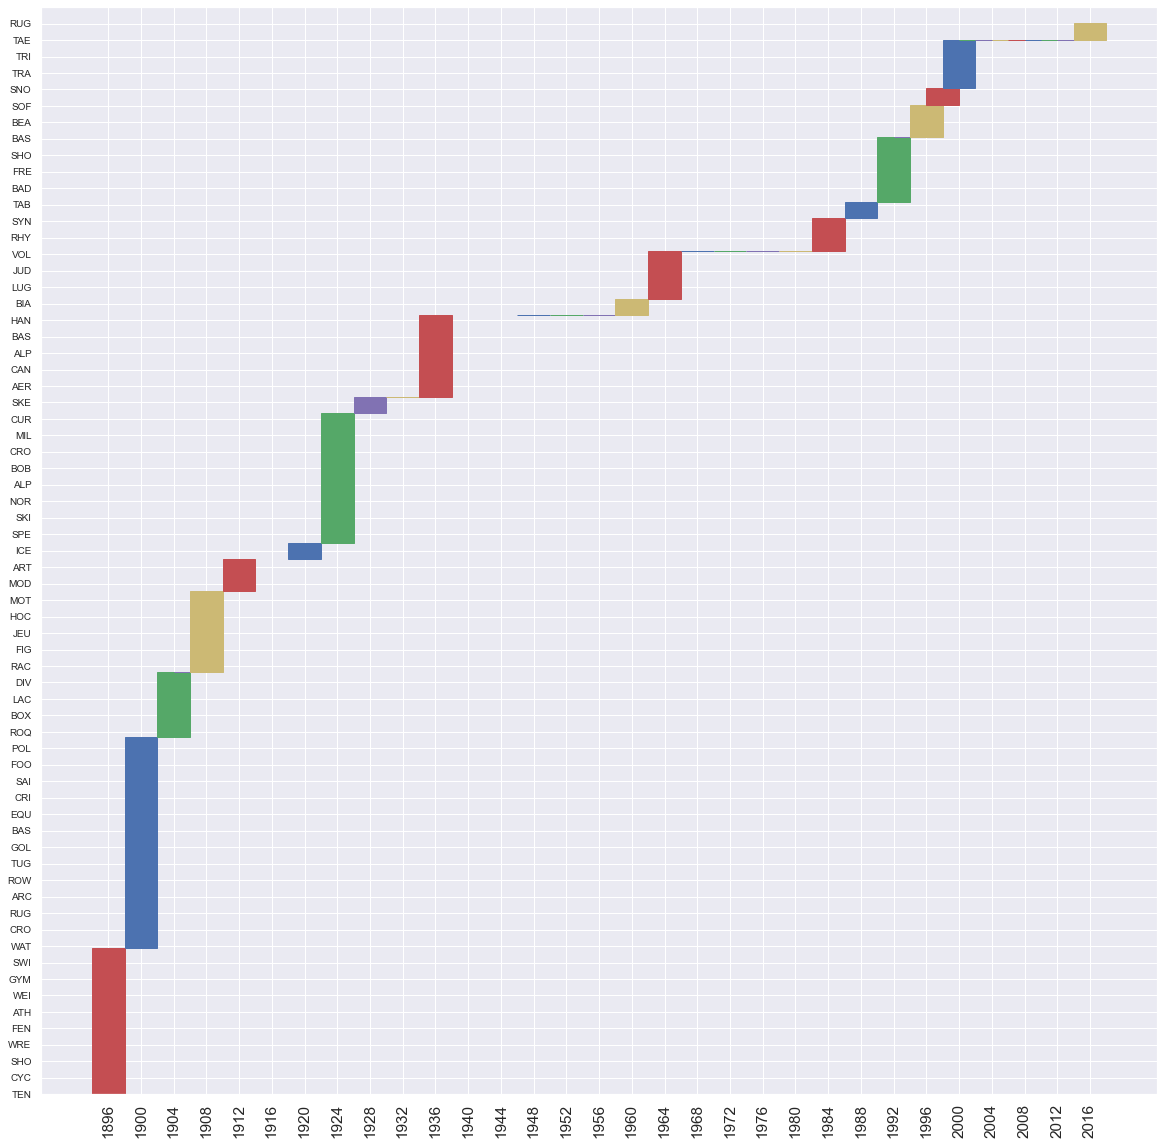

In [141]:
fig, axes = plt.subplots(figsize=(20, 20))

labels = [h[0:3].upper() for h in hist_aux]
years = list(new_sports.keys())

vetor_rect = []
h = 0
r = 0.985
colors = ['r', 'b', 'g', 'm', 'y'] * 7
for i, year in enumerate(years):
    if len(new_sports[year]) == 0: pass
    vetor_rect.append(Rectangle((year-2, h), 4, len(new_sports[year])*r, color=colors[i]))
    h += len(new_sports[year])*r
    axes.add_patch(vetor_rect[i])

plt.plot()
plt.xticks(np.arange(1896, 2020, step=4), rotation=90)
plt.ylim([0, len(labels)])
plt.yticks(np.arange(len(labels)), labels)
axes.tick_params(axis='y', labelsize=10)

plt.show()

In [166]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Sigla', 'Esporte'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center'),
    cells=dict(values=[labels, hist_aux], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center'))
])

fig.update_layout(width=800, height=1550, title='Tabela com o respectivo nome das siglas do gráfico acima') # autosize=True
fig.show()

## NOC

In [20]:
df_merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Número de medalhas por cidade

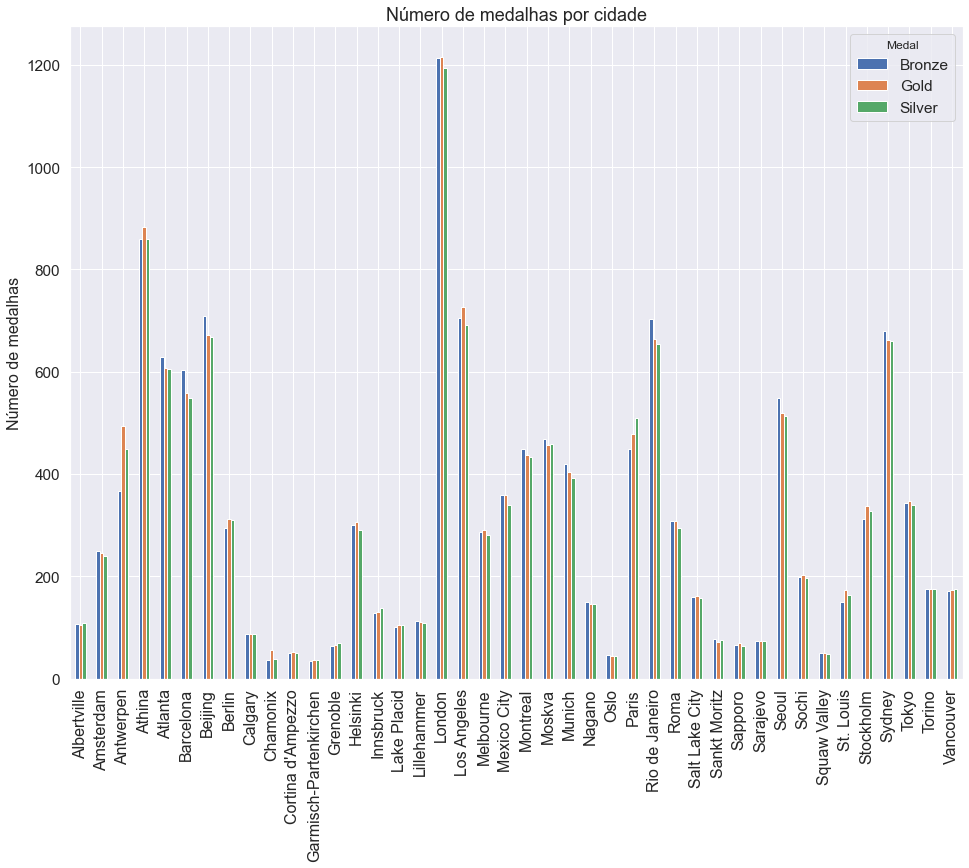

In [21]:
table = pd.crosstab(df_merged['City'], df['Medal'])
ax = table.plot(kind='bar', figsize=(16, 12))
ax.set_title('Número de medalhas por cidade', fontsize=18)
ax.set_xticks(range(len(table)))
ax.set_ylabel('Número de medalhas', fontsize=16)
ax.set_xlabel('')
ax.set_xticklabels(table.index, fontsize=16);

### Número de medalhas por país

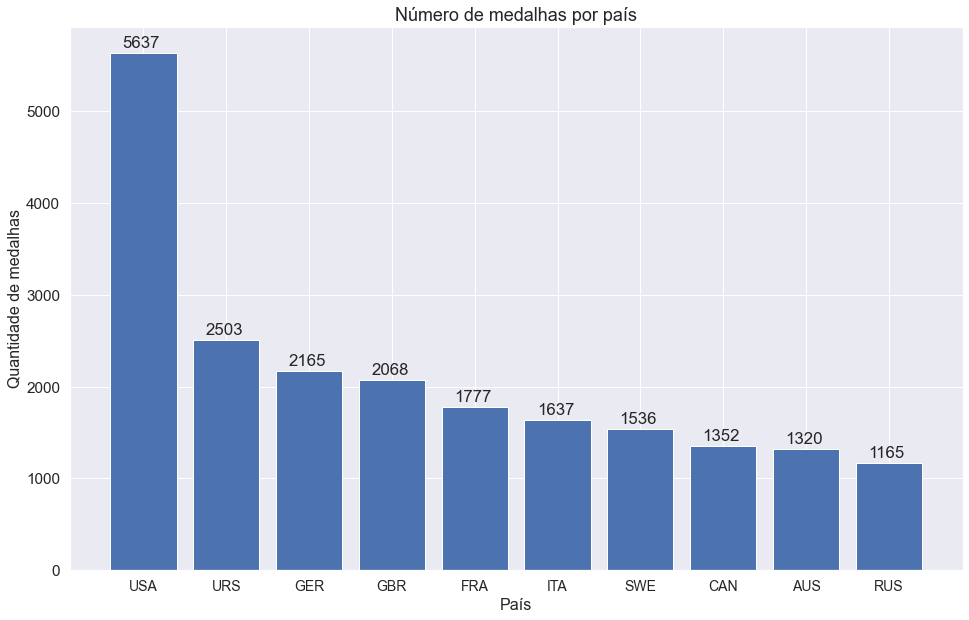

In [22]:
height = df_merged.groupby(['NOC'])['Medal'].count().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(figsize=(16, 10))
plt.bar(height.index, height)
ax.set_xlabel('País', fontsize=16)
ax.set_ylabel('Quantidade de medalhas', fontsize=16)
plt.title('Número de medalhas por país', fontsize=18)
xlocs, xlabs = plt.xticks()
xlocs=[i for i in range(0,10)]
xlabs=[label for label in height.index]
for i, v in enumerate(height):
    plt.text(xlocs[i] - 0.25, v + 60, str(v))
plt.xticks(xlocs, xlabs, fontsize=14)
plt.show()

## Competidor que mais ganhou/perdeu

In [23]:
df_nan = df.dropna(axis=0, subset=['Medal'])
count = df_nan.groupby('ID')['Medal'].size().sort_values(ascending=False)
first = count.index[0]
lasts = count.index[-30:]

### Competidor que mais ganhou: Michael Fred Phelps

In [42]:
first_df = df.loc[df['ID'] == first]
first_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
187887,94406,"Michael Fred Phelps, II",M,15.0,193.0,91.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NaN
187888,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze
187889,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
187890,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold
187891,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Butterfly,Gold


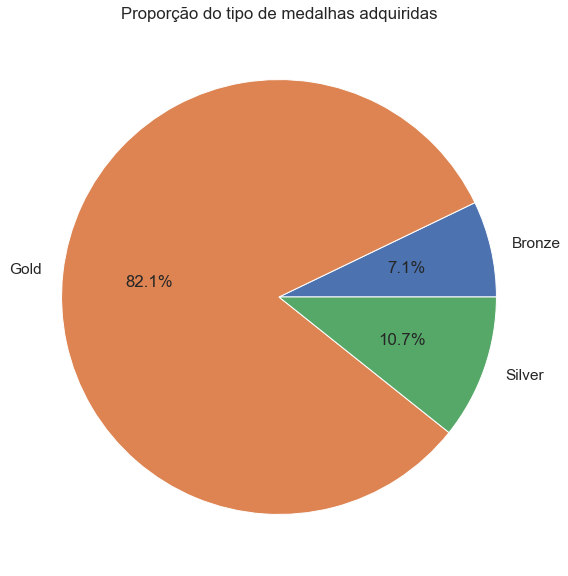

In [43]:
first_df.groupby('Medal').size().plot(kind='pie', figsize=(16, 10), autopct='%1.1f%%')
plt.ylabel('')
plt.title('Proporção do tipo de medalhas adquiridas')
plt.show()

### Competidores que não ganharam nenhuma medalha

In [28]:
lasts_df = df.loc[df['ID'].isin(lasts)]
lasts_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
141594,71036,"James ""Jim"" Logan",M,22.0,178.0,77.0,Canada,CAN,1956 Winter,1956,Winter,Cortina d'Ampezzo,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
141599,71038,M. L. Logan,M,NaN,NaN,NaN,Moseley Wanderers,GBR,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Silver
141627,71046,"Charles Paul ""Charlie"" Logg, Jr.",M,21.0,NaN,NaN,United States,USA,1952 Summer,1952,Summer,Helsinki,Rowing,Rowing Men's Coxless Pairs,Gold
141631,71049,Mihaela Loghin,F,32.0,170.0,78.0,Romania,ROU,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's Shot Put,Silver


### Atletas que mais participaram e não ganharam nenhuma medalha

[]

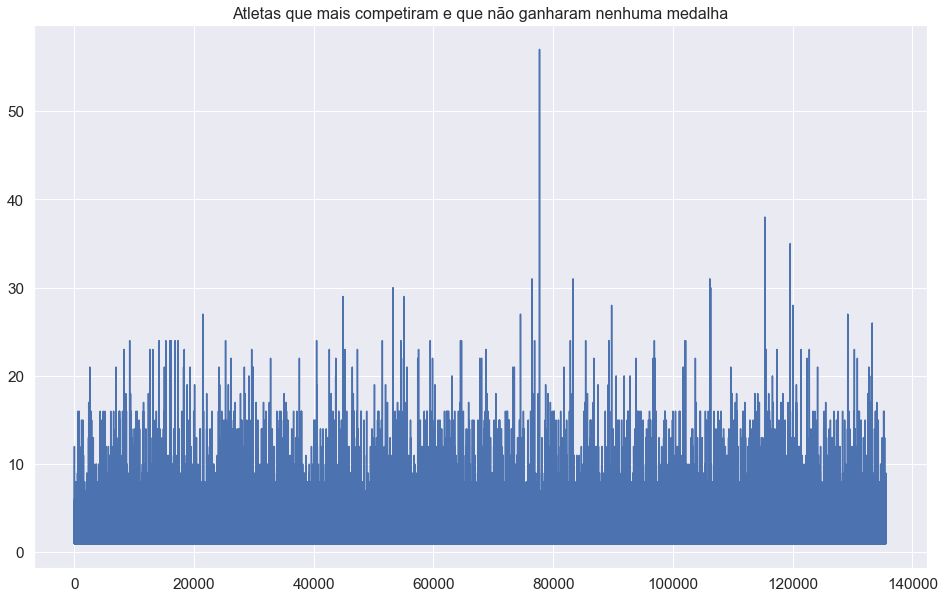

In [121]:
nan_medal = df.loc[df['Medal'].isnull()]
count = nan_medal.groupby('ID').size()
count.plot()
plt.xlabel('')
plt.title('Atletas que mais competiram e que não ganharam nenhuma medalha', fontsize=16)
plt.plot()

In [129]:
_id = count.index[values.index(max(count))]
no_medal_df = nan_medal.loc[df['ID'] == _id]
no_medal_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
154798,77710,Robert Tait McKenzie,M,44.0,NaN,NaN,Canada,CAN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN
154799,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154800,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154801,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154802,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [132]:
print('ID: {0}'.format(no_medal_df['ID'].iloc[0]))
print('Nome: {0}'.format(no_medal_df['Name'].iloc[0]))
print('Sexo: {0}'.format(no_medal_df['Sex'].iloc[0]))
print('Idade ao longo dos anos: {0}'.format(', '.join(str(round(v)) for v in no_medal_df['Age'].unique())))
print('Equipe: {0}'.format(no_medal_df['Team'].iloc[0]))
print('NOC: {0}'.format(no_medal_df['NOC'].iloc[0]))
print('Temporada: {0}'.format(no_medal_df['Season'].iloc[0]))
print('Anos: {0}'.format(', '.join(str(v) for v in no_medal_df['Year'].unique())))
print('Cidades: {0}'.format(', '.join(str(v) for v in no_medal_df['City'].unique())))
print('Esporte: {0}'.format(no_medal_df['Sport'].iloc[0]))

ID: 77710
Nome: Robert Tait McKenzie
Sexo: M
Idade ao longo dos anos: 44, 60, 65, 69, 81
Equipe: Canada
NOC: CAN
Temporada: Summer
Anos: 1912, 1928, 1932, 1936, 1948
Cidades: Stockholm, Amsterdam, Los Angeles, Berlin, London
Esporte: Art Competitions


## Sumário: Primeira e última olimpíada

In [29]:
def avg(data):
    return sum(data) / len(data)

In [30]:
df_uni = df.drop_duplicates(subset='ID', keep="first")

df_atenas = df_uni.loc[(df_uni['Year'] == 1896)]
df_rio = df_uni.loc[(df_uni['Year'] == 2016)]

imc_per_year = {k: list(set(v)) for k, v in df_atletas.groupby('Year')['IMC']}
imc_atenas = imc_per_year.pop(1896)
imc_rio = imc_per_year.pop(2016)


height_atenas = df_atenas['Height'].dropna(axis=0)
height_rio = df_rio['Height'].dropna(axis=0)

age_atenas = df_atenas['Age'].dropna(axis=0)
age_rio = df_rio['Age'].dropna(axis=0)

modalities_atenas = df_atenas.drop_duplicates(subset='Sport', keep="first")
modalities_rio = df_rio.drop_duplicates(subset='Sport', keep="first")

women_atenas = df_atenas.loc[(df_atenas['Sex'] == 'F')]
women_rio = df_rio.loc[(df_rio['Sex'] == 'F')]

print('Número de atletas em Atenas (1896): {0}'.format(len(df_atenas)))
print('Número de atletas no Rio (2016): {0}'.format(len(df_rio)))
print('____________________________________________________\n')

print('Número de atletas femeninas em Atenas (1896): {0}'.format(len(women_atenas)))
print('Número de atletas femeninas no Rio (2016): {0}'.format(len(women_rio)))
print('____________________________________________________\n')

print('IMC médio em Atenas (1896): {0}'.format(round(avg(imc_atenas), 2)))
print('IMC médio no Rio (2016): {0}'.format(round(avg(imc_rio), 2)))
print('____________________________________________________\n')

print('Altura média em Atenas (1896): {0}'.format(round(avg(height_atenas), 2)))
print('Altura média no Rio (2016): {0}'.format(round(avg(height_rio), 2)))
print('____________________________________________________\n')

print('Atleta mais alto em Atenas (1896): {0}'.format(max(height_atenas)))
print('Atleta mais alto no Rio (2016): {0}'.format(max(height_rio)))
print('____________________________________________________\n')

print('Atleta mais baixo em Atenas (1896): {0}'.format(min(height_atenas)))
print('Atleta mais baixo no Rio (2016): {0}'.format(min(height_rio)))
print('____________________________________________________\n')

print('Idade média em Atenas (1896): {0}'.format(round(avg(age_atenas), 2)))
print('Idade média no Rio (2016): {0}'.format(round(avg(age_rio), 2)))
print('____________________________________________________\n')

print('Idade do atleta mais novo em Atenas (1896): {0}'.format(round(min(age_atenas))))
print('Idade do atleta mais novo no Rio (2016): {0}'.format(round(min(age_rio))))
print('____________________________________________________\n')

print('Idade do atleta mais velho em Atenas (1896): {0}'.format(round(max(age_atenas))))
print('Idade do atleta mais velho no Rio (2016): {0}'.format(round(max(age_rio))))
print('____________________________________________________\n')

print('Número de modalidades em Atenas (1896): {0}'.format(len(modalities_atenas)))
print('Número de modalidades no Rio (2016): {0}'.format(len(modalities_rio)))
print('____________________________________________________\n')

Número de atletas em Atenas (1896): 176
Número de atletas no Rio (2016): 7192
____________________________________________________

Número de atletas femeninas em Atenas (1896): 0
Número de atletas femeninas no Rio (2016): 3196
____________________________________________________

IMC médio em Atenas (1896): 23.51
IMC médio no Rio (2016): 24.05
____________________________________________________

Altura média em Atenas (1896): 174.86
Altura média no Rio (2016): 176.42
____________________________________________________

Atleta mais alto em Atenas (1896): 188.0
Atleta mais alto no Rio (2016): 218.0
____________________________________________________

Atleta mais baixo em Atenas (1896): 154.0
Atleta mais baixo no Rio (2016): 133.0
____________________________________________________

Idade média em Atenas (1896): 23.14
Idade média no Rio (2016): 24.65
____________________________________________________

Idade do atleta mais novo em Atenas (1896): 10
Idade do atleta mais novo no Rio (

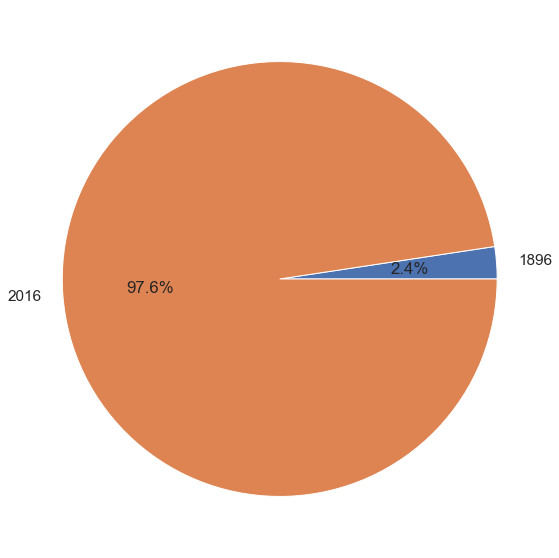

In [31]:
fig, ax = plt.subplots(figsize=(16, 10))
df_atenas_rio = df_uni.loc[df_uni['Year'].isin([1896, 2016])]
df_atenas_rio.groupby('Year').size().plot(kind='pie', ax=ax, autopct='%1.1f%%')
ax.set_ylabel('')
plt.show()

### Atenas

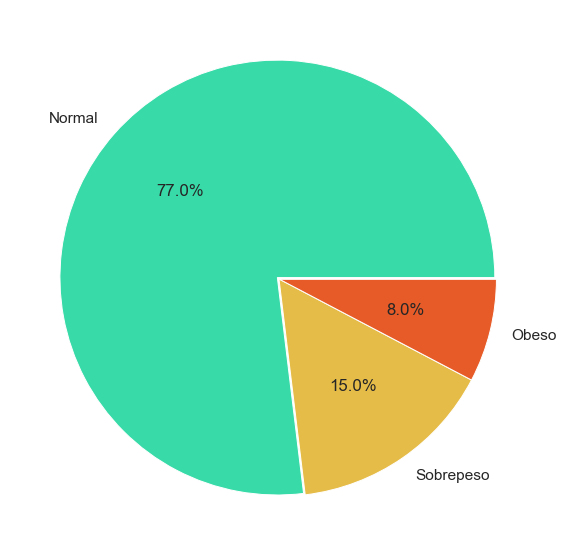

In [32]:
df_imc_atenas = {'Normal': 0, 'Sobrepeso': 0, 'Obeso': 0, 'Obeso grave': 0, 'Desnutrido': 0}

for atl in imc_atenas:
    if 18.5 <= atl < 25:
        df_imc_atenas['Normal'] += 1
    elif 25 <= atl < 30:
        df_imc_atenas['Sobrepeso'] += 1
    elif 30 <= atl < 40:
        df_imc_atenas['Obeso'] += 1
    elif atl >= 40:
        df_imc_atenas['Obeso grave'] += 1
    else:
        df_imc_atenas['Desnutrido'] += 1

labels = list(df_imc_atenas.keys())
sizes = list(df_imc_atenas.values())
explode = (0.01, 0, 0, 0, 0)
for key, value in df_imc_atenas.items():
    if value == 0:
        labels[labels.index(key)] = ''

fig, ax = plt.subplots(figsize=(16, 10))
ax.pie(sizes, explode = explode, labels=labels, colors=['#38DBA8', '#E6BC49', '#E65B27', '#E60020', '#7170D1'], autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '')
plt.show()

### Rio de Janeiro

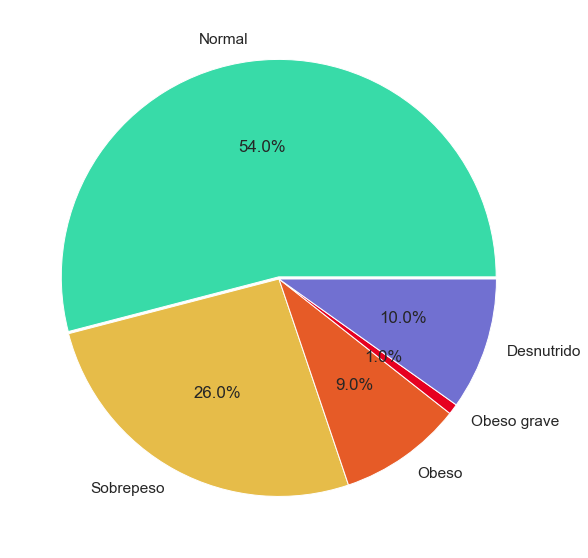

In [35]:
df_imc_rio = {'Normal': 0, 'Sobrepeso': 0, 'Obeso': 0, 'Obeso grave': 0, 'Desnutrido': 0}

for atl in imc_rio:
    if 18.5 <= atl < 25:
        df_imc_rio['Normal'] += 1
    elif 25 <= atl < 30:
        df_imc_rio['Sobrepeso'] += 1
    elif 30 <= atl < 40:
        df_imc_rio['Obeso'] += 1
    elif atl >= 40:
        df_imc_rio['Obeso grave'] += 1
    else:
        df_imc_rio['Desnutrido'] += 1

labels = list(df_imc_rio.keys())
sizes = list(df_imc_rio.values())
explode = (0.01, 0, 0, 0, 0)
for key, value in df_imc_rio.items():
    if value == 0:
        labels[labels.index(key)] = ''

fig, ax = plt.subplots(figsize=(16, 10))
ax.pie(sizes, explode = explode, labels=labels, colors=['#38DBA8', '#E6BC49', '#E65B27', '#E60020', '#7170D1'], autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '')
plt.show()

## Dados gerais

In [37]:
women = df_uni.loc[(df_uni['Sex'] == 'F')]
height = df_uni['Height'].dropna(axis=0)
weight = df_uni['Weight'].dropna(axis=0)
age = df_uni['Age'].dropna(axis=0)


print('Número de atletas: {0}'.format(len(df_uni)))
print('____________________________________________________\n')

print('Número de atletas do sexo femenino: {0}'.format(len(women)))
print('____________________________________________________\n')

print('Altura média: {0}'.format(round(avg(height), 2)))
print('Peso médio: {0}'.format(round(avg(weight), 2)))
print('____________________________________________________\n')

print('Mais alto: {0} m'.format(max(height)/100))
print('Maior massa: {0} kg'.format(max(weight)))
print('____________________________________________________\n')

print('Mais baixo: {0} m'.format(min(height)/100))
print('Menor massa: {0} kg'.format(min(weight)))
print('____________________________________________________\n')

print('Idade média: {0}'.format(round(avg(age), 2)))
print('Mais novo: {0}'.format(round(min(age))))
print('Mais velho: {0}'.format(round(max(age))))

Número de atletas: 135571
____________________________________________________

Número de atletas do sexo femenino: 33981
____________________________________________________

Altura média: 176.32
Peso médio: 71.96
____________________________________________________

Mais alto: 2.26 m
Maior massa: 214.0 kg
____________________________________________________

Mais baixo: 1.27 m
Menor massa: 25.0 kg
____________________________________________________

Idade média: 24.45
Mais novo: 10
Mais velho: 97


In [164]:
describe = df_uni.describe()
describe = describe.drop(['ID', 'Year'], axis=1)
columns = [['Métricas'], ['Idade'], ['Altura'], ['Peso']]
indexes = ['Média', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']
values = []

for value in describe.values[1:]:
    values.append(list(value))

values = list(np.transpose(values))
values.insert(0, indexes)

fig = go.Figure(data=[go.Table(
    header=dict(values=columns,
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center'),
    cells=dict(values=values, # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center'))
])

fig.update_layout(width=800, height=350)
fig.show()

In [39]:
df_cities = df_merged.drop_duplicates(subset='City', keep="last")
cities = list(df_cities['City'].unique())

In [40]:
import plotly.express as px

np.random.seed(12)
gapminder = px.data.gapminder().query("year==2007")

countries = {
    'Spain': [1],
    'Norway': [2],
    'France': [3],
    'United States': [4],
    'Germany': [5],
    'Belgium': [6],
    'Canada': [7],
    'Switzerland': [8],
    'Sweden': [9],
    'Yugoslavia': [10],
    'Japan': [11],
    'Mexico': [12],
    'Italy': [13],
    'Finland': [14],
    'Australia': [15],
    'South Korea': [16],
    'Soviet Union': [17],
    'China': [18],
    'United Kingdom': [19],
    'Netherlands': [20],
    'Greece': [21],
    'Brazil': [22],
    'Austria': [23],
    'Russia': [24]
}

data = pd.DataFrame(countries).T.reset_index()
data.columns=['country', 'count']

df_data = pd.merge(gapminder, data, how='left', on='country')

fig = px.choropleth(
    df_data,
    locations='iso_alpha',
    color='count', 
    hover_name='country', # column to add to hover information
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Países que já sediaram os jogos olímpicos')
fig.update_coloraxes(showscale=False)
fig.show()

In [41]:
fig = px.choropleth(
    locations=['CA', 'UT', 'GA', 'NY', 'MO'],
    locationmode='USA-states',
    color=[1,2,3,4,5],
    scope='usa',
    title='Estados dos EUA que sediaram os jogos olímpicos')
fig.update_coloraxes(showscale=False)
fig.show()